# Sentiment Analysis

In [1]:
import warnings

warnings.filterwarnings('ignore')
import os
import sys

sys.path.append(os.path.abspath(".."))
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from src.sentiment_analysis import (analyze_distilbert_sentiment,
                                    analyze_vader_sentiment)
from src.text_cleaning import clean_text_sentiment

2025-07-14 21:28:19.279371: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Device set to use cpu


In [2]:
df = pd.read_csv('../data/2_silver/reviews_cleaned.csv')
df

,reviewer,year,original_language,content,hospital
0,m555,2025,English,I had an ivf consultation with a female Prof. ...,UZ Brussel
1,Joan Rangel,2025,Spanish,Excellent hospital!! I recommend it.,UZ Brussel
2,juvo92,2025,Dutch,Friendly doctors and nurses. I don't really un...,UZ Brussel
3,LC,2025,French,I went to UZ Brussel in 2020 for egg cryoprese...,UZ Brussel
4,jutta henckaerts,2025,Dutch,The emergency department is horrible. If there...,UZ Brussel
...,...,...,...,...,...
1825,Line VAN DOOREN,2014,Dutch,good connection top Uza,UZ Antwerpen
1826,Irene von Birgelen,2013,Dutch,"Thanks to the UZA, we have already added 5 yea...",UZ Antwerpen
1827,Sofie L'Eau,2013,Dutch,Incompetent nurses and an ombudsman service wh...,UZ Antwerpen
1828,Robertina Van Damme,2013,Dutch,Be pampered again by Frank kine :-),UZ Antwerpen


In [3]:
df["clean_for_sentiment"] = df["content"].apply(clean_text_sentiment)

In [4]:
df[["vader_positive", "vader_neutral", "vader_negative", "vader_compound", "vader_sentiment"]] = df["clean_for_sentiment"].apply(analyze_vader_sentiment)

In [5]:
df

,reviewer,year,original_language,content,hospital,clean_for_sentiment,vader_positive,vader_neutral,vader_negative,vader_compound,vader_sentiment
0,m555,2025,English,I had an ivf consultation with a female Prof. ...,UZ Brussel,i had an ivf consultation with a female prof. ...,0.040,0.889,0.071,-0.7267,negative
1,Joan Rangel,2025,Spanish,Excellent hospital!! I recommend it.,UZ Brussel,excellent hospital!! i recommend it.,0.693,0.307,0.000,0.7772,positive
2,juvo92,2025,Dutch,Friendly doctors and nurses. I don't really un...,UZ Brussel,friendly doctors and nurses. i don't really un...,0.189,0.592,0.219,-0.1280,neutral
3,LC,2025,French,I went to UZ Brussel in 2020 for egg cryoprese...,UZ Brussel,i went to uz brussel in 2020 for egg cryoprese...,0.045,0.835,0.120,-0.9797,negative
4,jutta henckaerts,2025,Dutch,The emergency department is horrible. If there...,UZ Brussel,the emergency department is horrible. if there...,0.076,0.744,0.180,-0.8126,negative
...,...,...,...,...,...,...,...,...,...,...,...
1825,Line VAN DOOREN,2014,Dutch,good connection top Uza,UZ Antwerpen,good connection top uza,0.701,0.299,0.000,0.5719,positive
1826,Irene von Birgelen,2013,Dutch,"Thanks to the UZA, we have already added 5 yea...",UZ Antwerpen,"thanks to the uza, we have already added 5 yea...",0.195,0.805,0.000,0.4404,positive
1827,Sofie L'Eau,2013,Dutch,Incompetent nurses and an ombudsman service wh...,UZ Antwerpen,incompetent nurses and an ombudsman service wh...,0.089,0.662,0.248,-0.5859,negative
1828,Robertina Van Damme,2013,Dutch,Be pampered again by Frank kine :-),UZ Antwerpen,be pampered again by frank kine :-),0.277,0.723,0.000,0.3182,positive


In [6]:
df = analyze_distilbert_sentiment(df, text_column="content", label_column="distilbert_label", score_column="distilbert_score")

In [7]:
df

,reviewer,year,original_language,content,hospital,clean_for_sentiment,vader_positive,vader_neutral,vader_negative,vader_compound,vader_sentiment,distilbert_label,distilbert_score
0,m555,2025,English,I had an ivf consultation with a female Prof. ...,UZ Brussel,i had an ivf consultation with a female prof. ...,0.040,0.889,0.071,-0.7267,negative,negative,0.999486
1,Joan Rangel,2025,Spanish,Excellent hospital!! I recommend it.,UZ Brussel,excellent hospital!! i recommend it.,0.693,0.307,0.000,0.7772,positive,positive,0.999808
2,juvo92,2025,Dutch,Friendly doctors and nurses. I don't really un...,UZ Brussel,friendly doctors and nurses. i don't really un...,0.189,0.592,0.219,-0.1280,neutral,negative,0.986611
3,LC,2025,French,I went to UZ Brussel in 2020 for egg cryoprese...,UZ Brussel,i went to uz brussel in 2020 for egg cryoprese...,0.045,0.835,0.120,-0.9797,negative,negative,0.999744
4,jutta henckaerts,2025,Dutch,The emergency department is horrible. If there...,UZ Brussel,the emergency department is horrible. if there...,0.076,0.744,0.180,-0.8126,negative,negative,0.995120
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1825,Line VAN DOOREN,2014,Dutch,good connection top Uza,UZ Antwerpen,good connection top uza,0.701,0.299,0.000,0.5719,positive,positive,0.999867
1826,Irene von Birgelen,2013,Dutch,"Thanks to the UZA, we have already added 5 yea...",UZ Antwerpen,"thanks to the uza, we have already added 5 yea...",0.195,0.805,0.000,0.4404,positive,positive,0.995856
1827,Sofie L'Eau,2013,Dutch,Incompetent nurses and an ombudsman service wh...,UZ Antwerpen,incompetent nurses and an ombudsman service wh...,0.089,0.662,0.248,-0.5859,negative,negative,0.999505
1828,Robertina Van Damme,2013,Dutch,Be pampered again by Frank kine :-),UZ Antwerpen,be pampered again by frank kine :-),0.277,0.723,0.000,0.3182,positive,negative,0.989193


In [8]:
df.loc[df['vader_sentiment'] != df['distilbert_label']]['content'].iloc[3]

"Hello, I'm leaving a one-star rating, and that still seems like a lot. My father is on his third hospitalization at this hospital, and he still hasn't received any results. No doctor is capable of properly handling my father's case and processing his results; this is outrageous!!!"

In [9]:
print("Example positive review:\n")
print(df[df["distilbert_label"] == 'positive']["content"].iloc[5])
print("\nExample negative review:\n")
print(df[df["distilbert_label"] == 'negative']["content"].iloc[7])

Example positive review:

Very satisfied with the care of our two and a half year old little boy who was hospitalized for 11 days. When the nurse says the doctor will come, he/she is there within 30 minutes. The doctors are responsive and perform all the necessary tests quickly. The cafeteria is open every day until 7:30 p.m., which allows us to get out of the room a little. The hospital provided us with a free parking ticket per day as an accompanying parent, and there was a playroom with monitors to relieve the parents during the day. The staff is very pleasant and professional. We will definitely return to this hospital if we have any problems. The only downside is that the staff did not notify us when they put my son in "quarantine," so we opened the door to air out the room, and the nurse was not happy. Conversely, they also did not notify us when they lifted the "quarantine." We realized this because the nurses started entering the room without masks. This is the only communicati

In [10]:
print("Example positive review:\n")
print(df[df["vader_compound"] > 0.9]["content"].iloc[3])
print("\nExample negative review:\n")
print(df[df["vader_compound"] < -0.5]["content"].iloc[3])

Example positive review:

Most efficient and professional hospital I have ever seen around Europe so far. I had a smaller routine surgery here as a day patient and it was - as hospital visits go - the best experience I ever had. Everyone was suoer-helpful, kind and highly professional, all procedures were on time and processing went like clockwork. Thanks to all the UZ staff who took such wonderful care of me.

Example negative review:

Injured in an accident, I went to the emergency room at this hospital, but they didn't take me seriously. It's true that the tent was there quickly, in less than an hour. But otherwise, I'm very disappointed with both the nurses and the doctor because they didn't examine me properly, and in the end, not even a "come in today" or "get well soon" message.
None of that!
Very disappointed with their behavior as people who work in the medical field!!!! My first and last time!


In [11]:
df.to_csv('../data/3_results/reviews_with_sentiment.csv', index=False)

In [12]:
df = pd.read_csv("../data/3_results/reviews_with_sentiment.csv")
df

,reviewer,year,original_language,content,hospital,clean_for_sentiment,vader_positive,vader_neutral,vader_negative,vader_compound,vader_sentiment,distilbert_label,distilbert_score
0,m555,2025,English,I had an ivf consultation with a female Prof. ...,UZ Brussel,i had an ivf consultation with a female prof. ...,0.040,0.889,0.071,-0.7267,negative,negative,0.999486
1,Joan Rangel,2025,Spanish,Excellent hospital!! I recommend it.,UZ Brussel,excellent hospital!! i recommend it.,0.693,0.307,0.000,0.7772,positive,positive,0.999808
2,juvo92,2025,Dutch,Friendly doctors and nurses. I don't really un...,UZ Brussel,friendly doctors and nurses. i don't really un...,0.189,0.592,0.219,-0.1280,neutral,negative,0.986611
3,LC,2025,French,I went to UZ Brussel in 2020 for egg cryoprese...,UZ Brussel,i went to uz brussel in 2020 for egg cryoprese...,0.045,0.835,0.120,-0.9797,negative,negative,0.999744
4,jutta henckaerts,2025,Dutch,The emergency department is horrible. If there...,UZ Brussel,the emergency department is horrible. if there...,0.076,0.744,0.180,-0.8126,negative,negative,0.995120
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1825,Line VAN DOOREN,2014,Dutch,good connection top Uza,UZ Antwerpen,good connection top uza,0.701,0.299,0.000,0.5719,positive,positive,0.999867
1826,Irene von Birgelen,2013,Dutch,"Thanks to the UZA, we have already added 5 yea...",UZ Antwerpen,"thanks to the uza, we have already added 5 yea...",0.195,0.805,0.000,0.4404,positive,positive,0.995856
1827,Sofie L'Eau,2013,Dutch,Incompetent nurses and an ombudsman service wh...,UZ Antwerpen,incompetent nurses and an ombudsman service wh...,0.089,0.662,0.248,-0.5859,negative,negative,0.999505
1828,Robertina Van Damme,2013,Dutch,Be pampered again by Frank kine :-),UZ Antwerpen,be pampered again by frank kine :-),0.277,0.723,0.000,0.3182,positive,negative,0.989193



Processing sentiment labels for UZ Brussel...


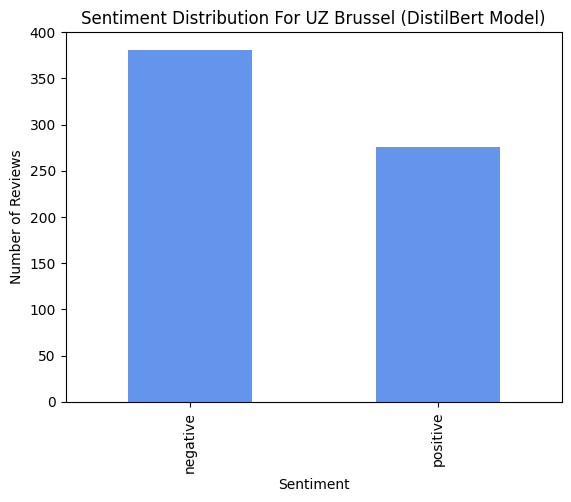


Processing sentiment labels for UZ Leuven Pellenberg...


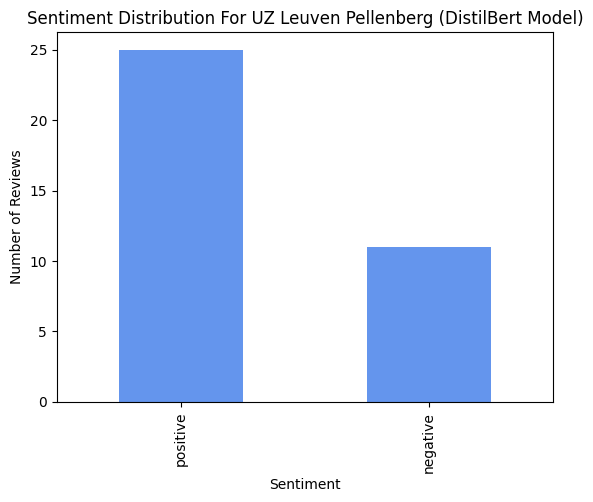


Processing sentiment labels for UZ Leuven Gasthuisberg...


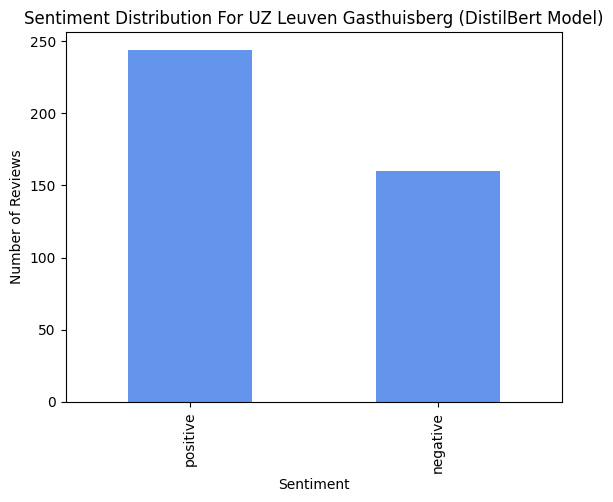


Processing sentiment labels for UZ Gent...


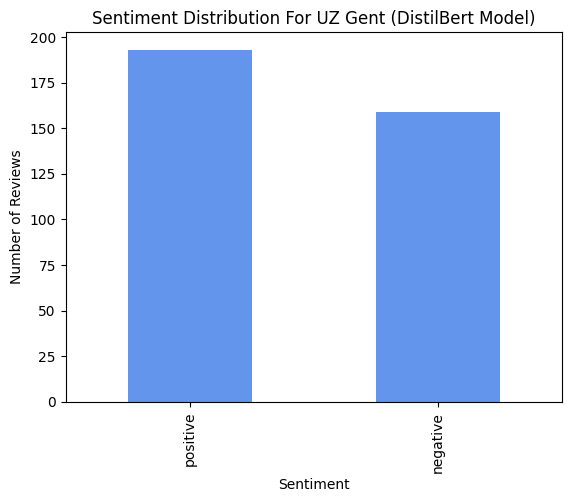


Processing sentiment labels for UZ Antwerpen...


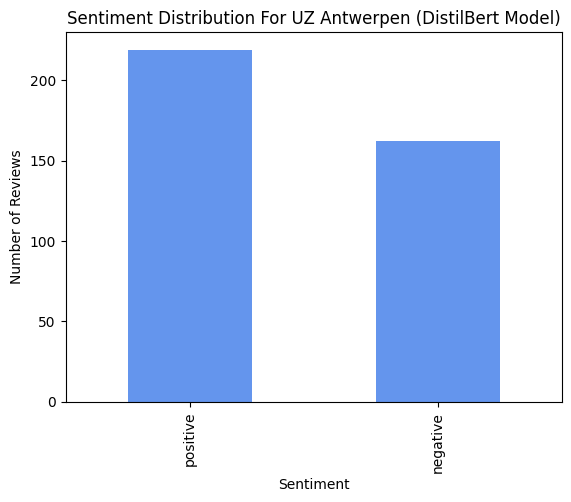

In [13]:
for hospital_name in df['hospital'].unique():
    print(f"\nProcessing sentiment labels for {hospital_name}...")
    hospital_df = df.loc[df['hospital'] == hospital_name]
    hospital_df['distilbert_label'].value_counts().plot(kind='bar', color='cornflowerblue')
    plt.title(f'Sentiment Distribution For {hospital_name} (DistilBert Model)')
    plt.xlabel('Sentiment')
    plt.ylabel('Number of Reviews')
    plt.show()